In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot  as plt
import scipy.stats as s
import scipy as sp
import seaborn as sns

In [10]:
df = pd.read_csv('../Datos_aseguradora.csv', encoding='latin-1')

## Claim Size

In [11]:
monto = df['Monto del siniestro'].values

In [12]:
t = np.arange(1,150000)

### Exponential Distribution

<AxesSubplot:ylabel='Count'>

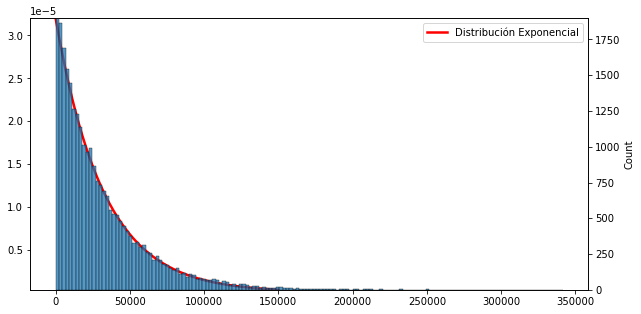

In [13]:
scale = 32210.24
lambd= 1/scale
thresh = 1018.79

exp_line = lambd * np.exp(-lambd*(t-thresh))

fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.margins(y=0)
ax2.margins(y=0)
# Definir la cantidad de bins para que el width de cada bin sea de 2000
bins = int(monto.max() / 2000)

sns.lineplot(x=t,y=exp_line, ax=ax1, color='red', linewidth = 2.5, label='Distribución Exponencial')
sns.histplot(monto, ax=ax2)

### Gamma Distribution

Text(0.5, 0.98, 'Histograma de Montos de Reclamo')

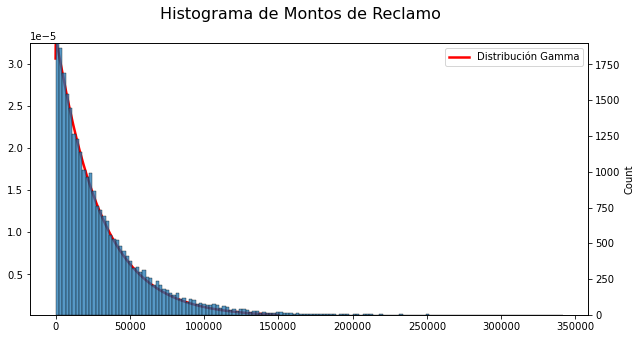

In [14]:
a = 1.012
scale = 29069
loc=0

gamma_line = s.gamma.pdf(t, a=a, scale=scale, loc=loc)

fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.margins(y=0)
ax2.margins(y=0)
# Definir la cantidad de bins para que el width de cada bin sea de 2000
bins = int(monto.max() / 2000)

sns.lineplot(x=t,y=gamma_line, ax=ax1, color='red', linewidth = 2.5, label='Distribución Gamma')
sns.histplot(monto, ax=ax2)
fig.suptitle('Histograma de Montos de Reclamo', fontsize=16)

# Claims Frequency (Poisson)

In [15]:
time_steps = 25
mu = 74.2
lambd = 1/mu
u = np.random.uniform(size=time_steps)

cnts = []

for x in range(30):
    time = 0
    cnt = 0
    while time < 1:
        
        u = np.random.uniform()
        freq_per_time = (-np.log(u))/mu
        time += freq_per_time
        cnt += 1

    cnts.append(cnt)

<AxesSubplot:xlabel='Time (Day)', ylabel='Freq'>

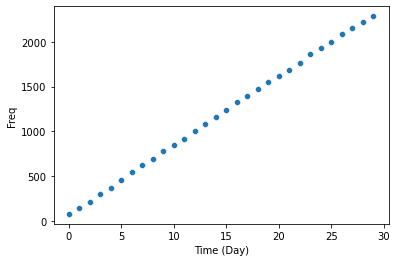

In [24]:
df = pd.DataFrame(cnts).cumsum()
df.reset_index(inplace=True)
df = df.rename(columns={'index':'Time (Day)', 0: 'Freq'})
sns.scatterplot(x=df['Time (Day)'], y=df['Freq'])